# Mesure de contraste

In [1]:
import os
import pandas as pd
import numpy as np
import cv2
import random
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
data_folder = "../../data"

In [4]:
import sys
sys.path.insert(0, '../data_loading_and_pretreatments/')
from outlier_identification import contrast_img_indicators, get_all_masks_size, get_black_proportion_in_img, color_concentration, outliers_id

In [5]:
data_meta = pd.read_csv(os.path.join(data_folder,"aggregated_metadata.csv"), index_col=0)
data_meta.head()

,file_name,format,resolution,url,data_type
0,COVID-1,PNG,256*256,https://sirm.org/category/senza-categoria/covi...,Covid
1,COVID-2,PNG,256*256,https://sirm.org/category/senza-categoria/covi...,Covid
2,COVID-3,PNG,256*256,https://sirm.org/category/senza-categoria/covi...,Covid
3,COVID-4,PNG,256*256,https://sirm.org/category/senza-categoria/covi...,Covid
4,COVID-5,PNG,256*256,https://sirm.org/category/senza-categoria/covi...,Covid


## Indicateurs de contraste et de lisibilité des images en fonction des métadonnées

In [6]:
# Calcul de l'indice de contraste, du niveau moyen et de l'écart-type des niveaux de gris de chaque image.

contrast_df = contrast_img_indicators(0.05)

In [7]:
# Fusion des métadonnées avec les indicateurs de contraste calculés

data_meta['name_lower'] = data_meta['file_name'].str.lower()
contrast_df['name_lower'] = contrast_df['file_name'].str.lower()
contrast_img_data = data_meta.drop(columns=['resolution', 'format']).merge(contrast_df, on="name_lower")

contrast_img_data = contrast_img_data.drop(columns=['file_name_y', 'name_lower']).rename({'file_name_x' : 'file_name'})


In [8]:
print(contrast_df.shape)
print(data_meta.shape)
contrast_img_data.info()
contrast_img_data.describe()


(21165, 5)
(21165, 6)
<class 'pandas.core.frame.DataFrame'>
Index: 21165 entries, 0 to 21164
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   file_name_x          21165 non-null  object 
 1   url                  21165 non-null  object 
 2   data_type            21165 non-null  object 
 3   color_mean           21165 non-null  float64
 4   color_std            21165 non-null  float64
 5   color_concentration  21165 non-null  float64
dtypes: float64(3), object(3)
memory usage: 1.1+ MB


,color_mean,color_std,color_concentration
count,21165.000000,21165.000000,21165.000000
mean,129.908506,59.017312,206.034727
std,23.491756,11.104801,29.202059
min,25.511381,14.145251,48.000000
25%,113.313184,51.657089,193.000000
50%,127.133891,60.104209,214.000000
75%,146.682901,67.152950,226.000000
max,229.141676,106.998675,255.000000


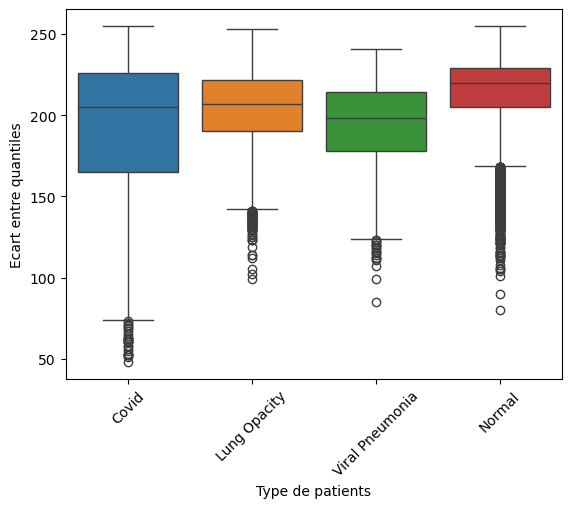

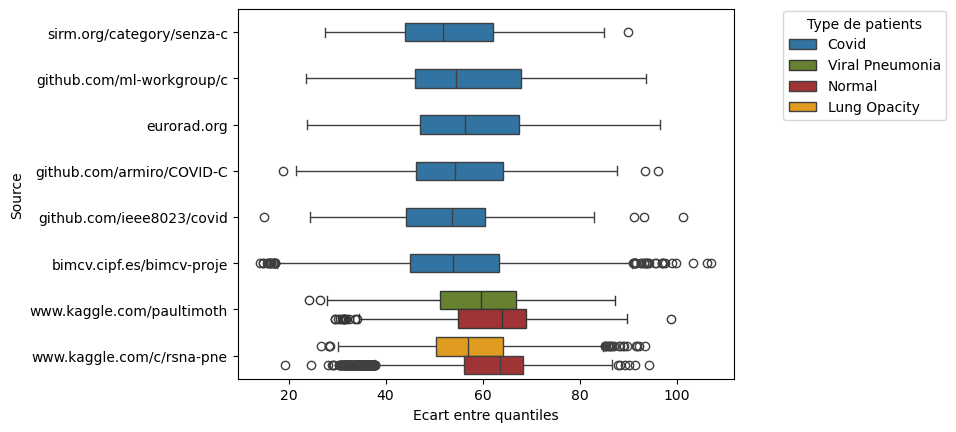

In [11]:
contrast_img_data['truncated_url'] = contrast_img_data.url.str.replace("https://", "").apply(lambda x: x[0:25])

sns.boxplot(data=contrast_img_data, x="data_type", y="color_concentration", hue='data_type')
plt.xticks(rotation=45)
plt.xlabel("Type de patients")
plt.ylabel("Ecart entre quantiles")
plt.show()

sns.boxplot(data=contrast_img_data[contrast_img_data.data_type=="Covid"], y="truncated_url", x="color_std", hue='data_type', width=0.4)
sns.boxplot(data=contrast_img_data[contrast_img_data.url=="https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia"], y="truncated_url", x="color_std", hue='data_type', 
            palette={'Viral Pneumonia' : 'olivedrab', 'Normal' : 'firebrick'})
sns.boxplot(data=contrast_img_data[contrast_img_data.url=="https://www.kaggle.com/c/rsna-pneumonia-detection-challenge/data"], y="truncated_url", x="color_std", hue='data_type',
            palette={'Lung Opacity' : 'orange', 'Normal' : 'firebrick'})
plt.ylabel("Source")
plt.xlabel("Ecart entre quantiles")
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), loc=(1.1,0.7), title="Type de patients",)


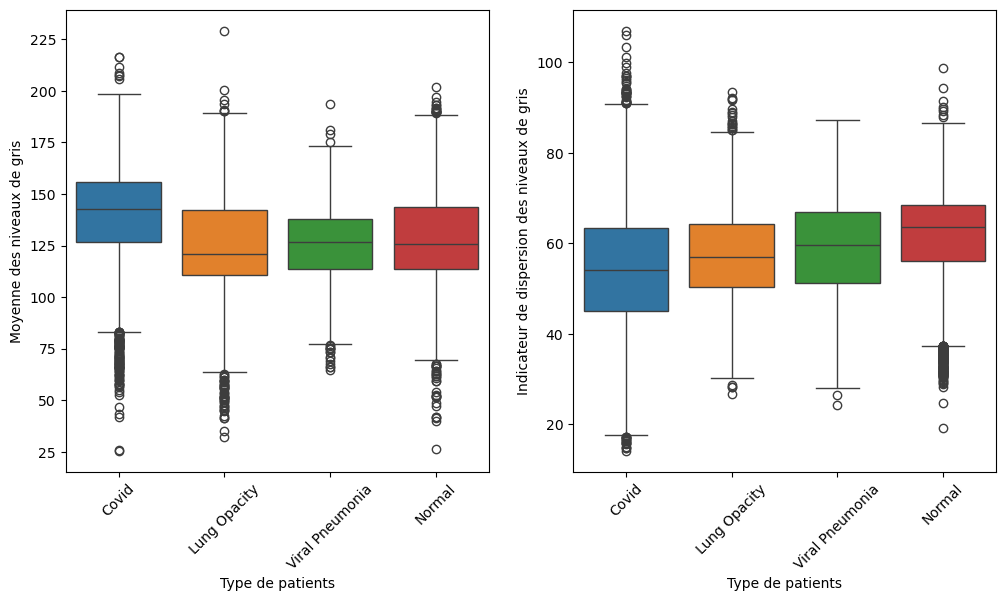

In [12]:
fig = plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)
sns.boxplot(data=contrast_img_data, x="data_type", y="color_mean", hue='data_type')
plt.xticks(rotation=45)
plt.xlabel("Type de patients")
plt.ylabel("Moyenne des niveaux de gris")

plt.subplot(1,2,2)
sns.boxplot(data=contrast_img_data, x="data_type", y="color_std", hue='data_type')
plt.xticks(rotation=45)
plt.xlabel("Type de patients")
plt.ylabel("Indicateur de dispersion des niveaux de gris")
plt.show()

# sns.boxplot(data=contrast_img_data, y="truncated_url", x="color_std", hue='data_type', width=1.5)
# plt.ylabel("Source")
# plt.ylim((-1,8))
# plt.xlabel("Dispersion des niveaux de gris")
# plt.legend(loc=(1.1,0.7), title="Type de patients")

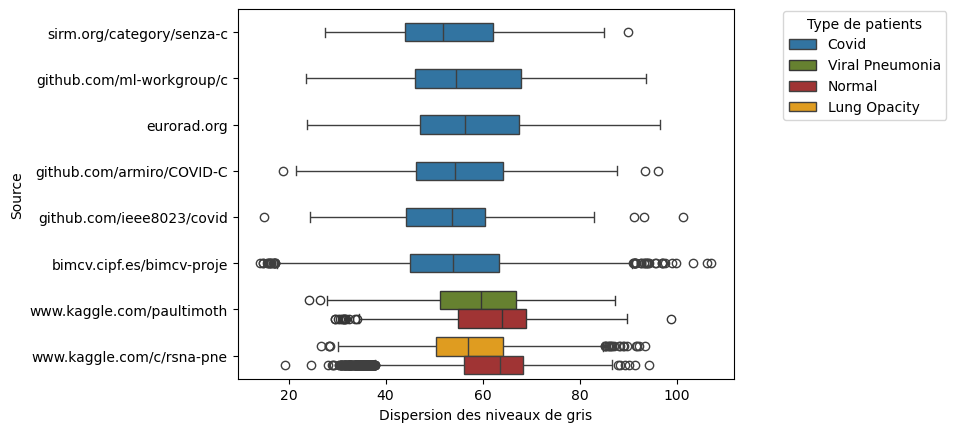

In [14]:
sns.boxplot(data=contrast_img_data[contrast_img_data.data_type=="Covid"], y="truncated_url", x="color_std", hue='data_type', width=0.4)
sns.boxplot(data=contrast_img_data[contrast_img_data.url=="https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia"], y="truncated_url", x="color_std", hue='data_type', 
            palette={'Viral Pneumonia' : 'olivedrab', 'Normal' : 'firebrick'})
sns.boxplot(data=contrast_img_data[contrast_img_data.url=="https://www.kaggle.com/c/rsna-pneumonia-detection-challenge/data"], y="truncated_url", x="color_std", hue='data_type',
            palette={'Lung Opacity' : 'orange', 'Normal' : 'firebrick'})
plt.ylabel("Source")
plt.xlabel("Dispersion des niveaux de gris")
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), loc=(1.1,0.7), title="Type de patients",)
